
# DC resitivity data 
## modelling and inversion

This is modified (simplified) from the script https://www.pygimli.org/_examples_auto/joint_inversion/plot_1_dcem.html


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {    return false;}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore') # just to make it cleaner in the notebook
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.mplviewer import drawModel1D
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
transRhoa = pg.RTransLog()
transThk = pg.RTransLog()
transRes = pg.RTransLogLU(1., 1000.)

# Inversion

### dat1 are the apparent resistivities<br />a1 are the relative electrode spacings, <br />m1 is just a vector of ones (weights for each electrode in the inverse process)


In [37]:
# example:
dat1=np.asarray([206.79244185, 198.32207986, 197.92498001, 195.82072024,\
        200.62595155, 192.89268048, 179.94609753, 149.8761764 ,\
        123.32241509,  93.48568541,  60.03475849,  38.45088226,\
         28.97733703,  30.81854024,  32.9805305 ,  35.51872075,\
         41.86190871,  43.3125642 ,  45.04428067,  44.85161888]);
a1=np.asarray([  3.,   3.9, 5.07,   6.591  ,8.5683    ,  11.13879   ,  14.480427, \
           18.8245551 , 24.47192163,  31.81349812,  41.35754755,  \
           53.76481182, 69.89425537,  90.86253198, 118.12129157, 153.55767904, \
           199.62498275, 259.51247758, 337.36622086, 438.57608711]);
m1=np.asarray([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1.]);

In [38]:
nlay=3 # hypothesis for the number of layers
noiseDC = 3.  # in per cent
#lamDC = 2.  # regularization strength
verbose = False
gDC=pg.DC1dModelling(nlay, a1, m1) # create a container with the setup
### recall the "original" input model to plot as reference:
thk = pg.RVector(nlay - 1, 15.0)  # 15m thickness each
res = pg.RVector(nlay, 200.0)  # 200 Ohmm
#res[1] = 10.
#res[2] = 50.

## Set up inversion and run

In [100]:
# Set up the DC inversion and let it run.
import time
invDC = pg.RInversion(dat1, gDC, transRhoa, verbose)
modelDC = pg.RVector(nlay*2-1, 20.)
invDC.setModel(modelDC)
invDC.setRelativeError(noiseDC/100.)
invDC.setMarquardtScheme(0.9)
lams=[1,2,40]
models=[];resus=[];
for i, val in enumerate(lams):
    invDC.setLambda(val)
    modelDC = invDC.run()
    respDC = invDC.response()
    models.append(modelDC)
    resus.append(respDC)

## Finally, plot the results and the original model for ref. <br /> Also show the resistivity from the inverted model and its fit with the original data

<IPython.core.display.Javascript object>


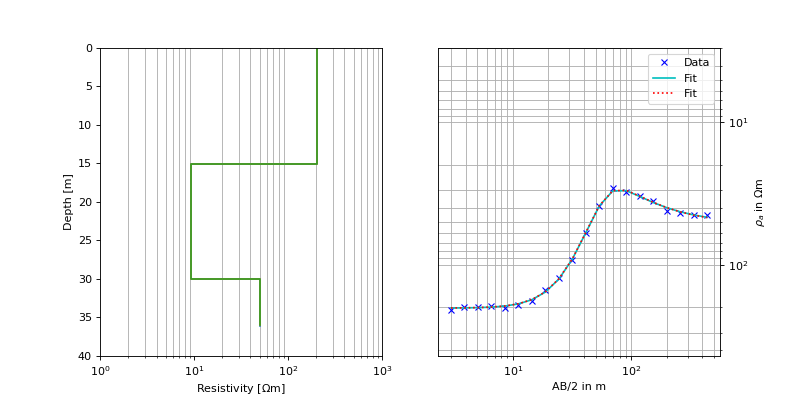

0
1
2


In [101]:
fig = plt.figure(figsize=(10, 5))
plt.clf()
ax1 = fig.add_subplot(121)
#drawModel1D(ax1, thk, res, plot='semilogx', color='blue')

for i, val in enumerate(lams):
    print(i)
    drawModel1D(ax1, models[i](0, nlay-1),models[i](nlay-1, nlay*2-1), plot='semilogx')
    
#ax1.legend(('DC'))
ax1.set_xlim((1., 1000.))
ax1.set_ylim((40., 0.))
ax1.grid(which='both')
#ax1.axis('tight')

ax3 = fig.add_subplot(122)
ax3.loglog(a1, dat1, 'bx', label='Data')
ax3.loglog(a1, respDC4,'c-', label='Fit')
ax3.loglog(a1, respDC2,'r:', label='Fit')
ax3.axis('tight')
ax3.set_ylim((max(a1), min(a1)))
ax3.grid(which='both')
ax3.set_ylabel(r"$\rho_a$ in $\Omega$m")
ax3.set_xlabel("AB/2 in m")
ax3.yaxis.set_ticks_position("right")
ax3.yaxis.set_label_position("right")
ax3.legend(loc="best")

pg.wait()

In [98]:
# Set up the DC inversion and let it run.
import time
invDC = pg.RInversion(dat1, gDC, transRhoa, verbose)
modelDC = pg.RVector(nlay*2-1, 20.)
invDC.setModel(modelDC)
invDC.setRelativeError(noiseDC/100.)
invDC.setMarquardtScheme(0.9)
models=[];resus=[];
invDC.setLambda(5.0)
modelDC = invDC.run()
respDC = invDC.response()
models.append(modelDC)
resus.append(respDC)

## Finally, plot the results and the original model for ref. <br /> Also show the resistivity from the inverted model and its fit with the original data

<IPython.core.display.Javascript object>


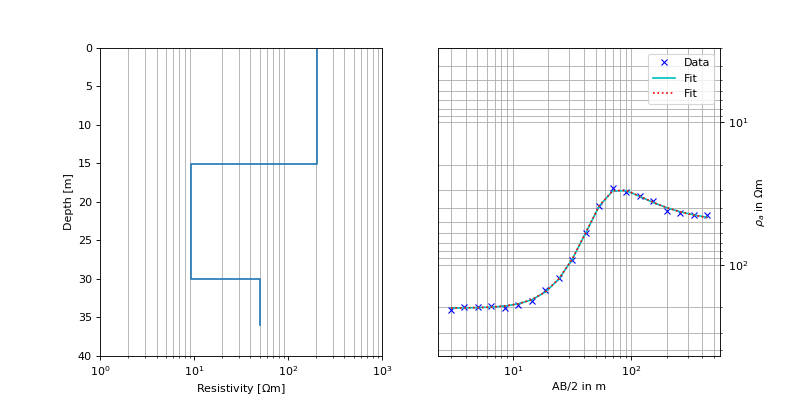

In [102]:
fig = plt.figure(figsize=(10, 5))
plt.clf()
ax1 = fig.add_subplot(121)

drawModel1D(ax1, models[i](0, nlay-1),models[i](nlay-1, nlay*2-1), plot='semilogx')
    
#ax1.legend(('DC'))
ax1.set_xlim((1., 1000.))
ax1.set_ylim((40., 0.))
ax1.grid(which='both')
#ax1.axis('tight')

ax3 = fig.add_subplot(122)
ax3.loglog(a1, dat1, 'bx', label='Data')
ax3.loglog(a1, respDC4,'c-', label='Fit')
ax3.loglog(a1, respDC2,'r:', label='Fit')
ax3.axis('tight')
ax3.set_ylim((max(a1), min(a1)))
ax3.grid(which='both')
ax3.set_ylabel(r"$\rho_a$ in $\Omega$m")
ax3.set_xlabel("AB/2 in m")
ax3.yaxis.set_ticks_position("right")
ax3.yaxis.set_label_position("right")
ax3.legend(loc="best")

pg.wait()

In [12]:
# Stefan Nielsen, January 2020, modified from the following source:
# Günther, T. (2013): On Inversion of Frequency Domain Electromagnetic Data in
# Salt Water Problems - Sensitivity and Resolution. Ext. Abstr., 19th European
# Meeting of Environmental and Engineering Geophysics, Bochum, Germany.